In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline

In [13]:
data_train_db = pd.read_csv('data_train_db.csv')
data_test_db = pd.read_csv('data_test_db.csv')

In [14]:
# It seems like there are some data points which have much higher standard deviation than most. Lets just remove those.

def clean_dataset(data):
    to_drop= []
    for k in range(data.shape[0]):
        if data[k,:].std()>15:
            to_drop.append(k)   
    return np.delete(data, to_drop, axis = 0)

data_train = data_train_db.values
columns=data_train_db.columns

data_train = clean_dataset(data_train)
df_train=pd.DataFrame(data_train,columns=columns)
df_train

Running  Blue Switch On  Battery level  Humidity  Magnetic field  \
0         1.0             1.0       0.472619  0.681050        0.884694   
1         1.0             1.0       0.688965  0.988019        0.716011   
2         1.0             1.0       0.788401  0.752765        0.801923   
3         0.0             1.0       0.739938  0.517953        0.431417   
4         1.0             1.0       0.525988  0.532473        0.920489   
...       ...             ...            ...       ...             ...   
1990      0.0             0.0       0.769291  0.511468        0.771281   
1991      0.0             1.0       0.919421  0.602992        0.486138   
1992      0.0             1.0       0.567702  0.849342        0.667941   
1993      1.0             1.0       0.775856  0.519847        0.639920   
1994      1.0             1.0       0.699950  0.850161        0.975891   

      Controller beige  Controller bisque  Controller black  \
0             0.888819           0.949818          0.656389   
1             0.567877           0.463229          0.424654   
2             0.847497           0.743526          0.931443   
3             0.894524           0.752744          0.907213   
4             0.898508           0.707683          0.743687   
...                ...                ...               ...   
1990          0.492626           0.628502          0.567015   
1991          0.749335           0.550056          0.951137   
1992          0.618418           0.699603          0.964992   
1993          0.708855           0.529903          0.892855   
1994          0.933829           0.836099          0.406472   

      Controller blanchedalmond  Time since restart  ...  \
0                      0.788241            8.031743  ...   
1                      0.931444            5.165232  ...   
2                      0.768209            9.436875  ...   
3                      0.871284            3.651928  ...   
4                      0.726896            6.582867  ...   
...                         ...                 ...  ...   
1990                   0.486130            3.870176  ...   
1991                   0.531395            0.243047  ...   
1992                   0.608648            0.306824  ...   
1993                   0.615023            6.214098  ...   
1994                   0.576607            6.833723  ...   

      Waste level right tank  Waste level left tank  Helium reservoir  \
0                   0.921479               0.759088          0.742684   
1                   0.562749               0.932735          0.684856   
2                   0.881300               0.417064          0.468547   
3                   0.926289               0.464410          0.958722   
4                   0.434560               0.746746          0.466800   
...                      ...                    ...               ...   
1990                0.805892               0.685387          0.569820   
1991                0.458277               0.760053          0.966851   
1992                0.666477               0.443474          0.891313   
1993                0.671941               0.849912          0.841967   
1994                0.518914               0.905731          0.492258   

      alpha-radiation  Active motion supression  Blade density  \
0            0.958868                  0.546771       0.736409   
1            0.914809                  0.972892       0.450422   
2            0.796907                  0.986931       0.847634   
3            0.520464                  0.999992       0.838839   
4            0.942878                  0.781556       0.850591   
...               ...                       ...            ...   
1990         0.720401                  0.589550       0.951099   
1991         0.664607                  0.612039       0.523509   
1992         0.755928                  0.553219       0.831568   
1993         0.430774                  0.426931       0.597850   
1994         0.485120               

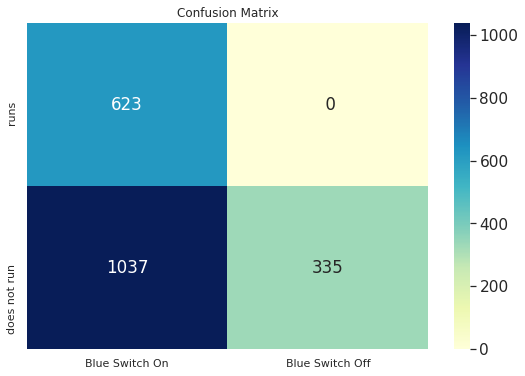

In [15]:
runs_switchon = np.count_nonzero((data_train[:,0]==1)*(data_train[:,1]==1))
runs_switchoff = np.count_nonzero((data_train[:,0]==1)*(data_train[:,1]==0))
runsnot_switchon = np.count_nonzero((data_train[:,0]==0)*(data_train[:,1]==1))
runsnot_switchoff = np.count_nonzero((data_train[:,0]==0)*(data_train[:,1]==0))
conf_matrix = [[runs_switchon, runs_switchoff], [runsnot_switchon, runsnot_switchoff]]

sn.set(color_codes=True)
plt.figure(1, figsize=(9, 6))

plt.title("Confusion Matrix")

sn.set(font_scale=1.4)
ax = sn.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='2')

ax.set_yticklabels(['runs', 'does not run'])
ax.set_xticklabels(['Blue Switch On', 'Blue Switch Off'])
plt.show()


Hence if the **Blue Switch On** is off=0 the machine does not run

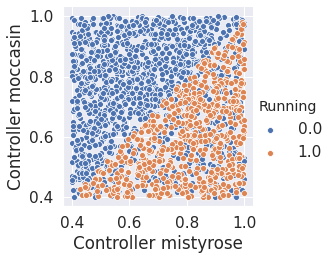

In [16]:
sn.pairplot(df_train,y_vars=columns[99],x_vars=columns[98],hue="Running",plot_kws={"s": 35},height=4)
plt.show()

Therefore we know that if **Controller moccasin > Controller mistyrose** the machine does not work 


In [17]:
errors=0
for i in range(1000):
    if df_train["Controller mistyrose"][i]<=df_train["Controller moccasin"][i] and df_train["Running"][i]==1:
        errors+=1
print("We had", errors, "errors :)")

We had 0 errors :)


Well also check some of the others highly corrolated variables for easily spotted deppendencies but dont recognise any for now (ok we see one more but we ignore it for now)

In [393]:
df_train.corr()
S=np.argsort(np.abs(np.array(df_train.corr()['Running'])))[::-1]
S=np.delete(S,[0,3])
S

array([98, 99, 72, 70, 73, 74, 71, 82, 84, 80, 68, 36,  3, 44, 64, 55, 21,
       78, 14, 25, 91, 56, 46, 24,  4, 83, 27,  9, 15, 52, 29, 31, 92, 41,
       53,  6, 81, 33, 26, 10, 90, 18, 40, 45, 61, 69, 63, 30,  5, 77, 95,
       23, 42, 51, 87, 20, 48, 79, 13, 60, 49, 76, 65, 47, 86, 93, 16, 54,
       85, 28, 97, 17, 96, 66, 34, 58,  2, 43, 11, 12, 62, 32,  7, 75, 89,
       38, 94, 50, 35, 88, 22, 19, 57, 67, 59, 39, 37,  8])

In [394]:
df_trainj=df_train.copy()
#We identify the binary columns
CB=[c for c in columns if len(np.unique(df_train[c]))<20]
CB=CB[2:]#We ignore the "Running" and "Blue Swich On"
for c in CB:
    df_trainj[c]+=np.random.uniform(-1/4,1/4,len(df_trainj))


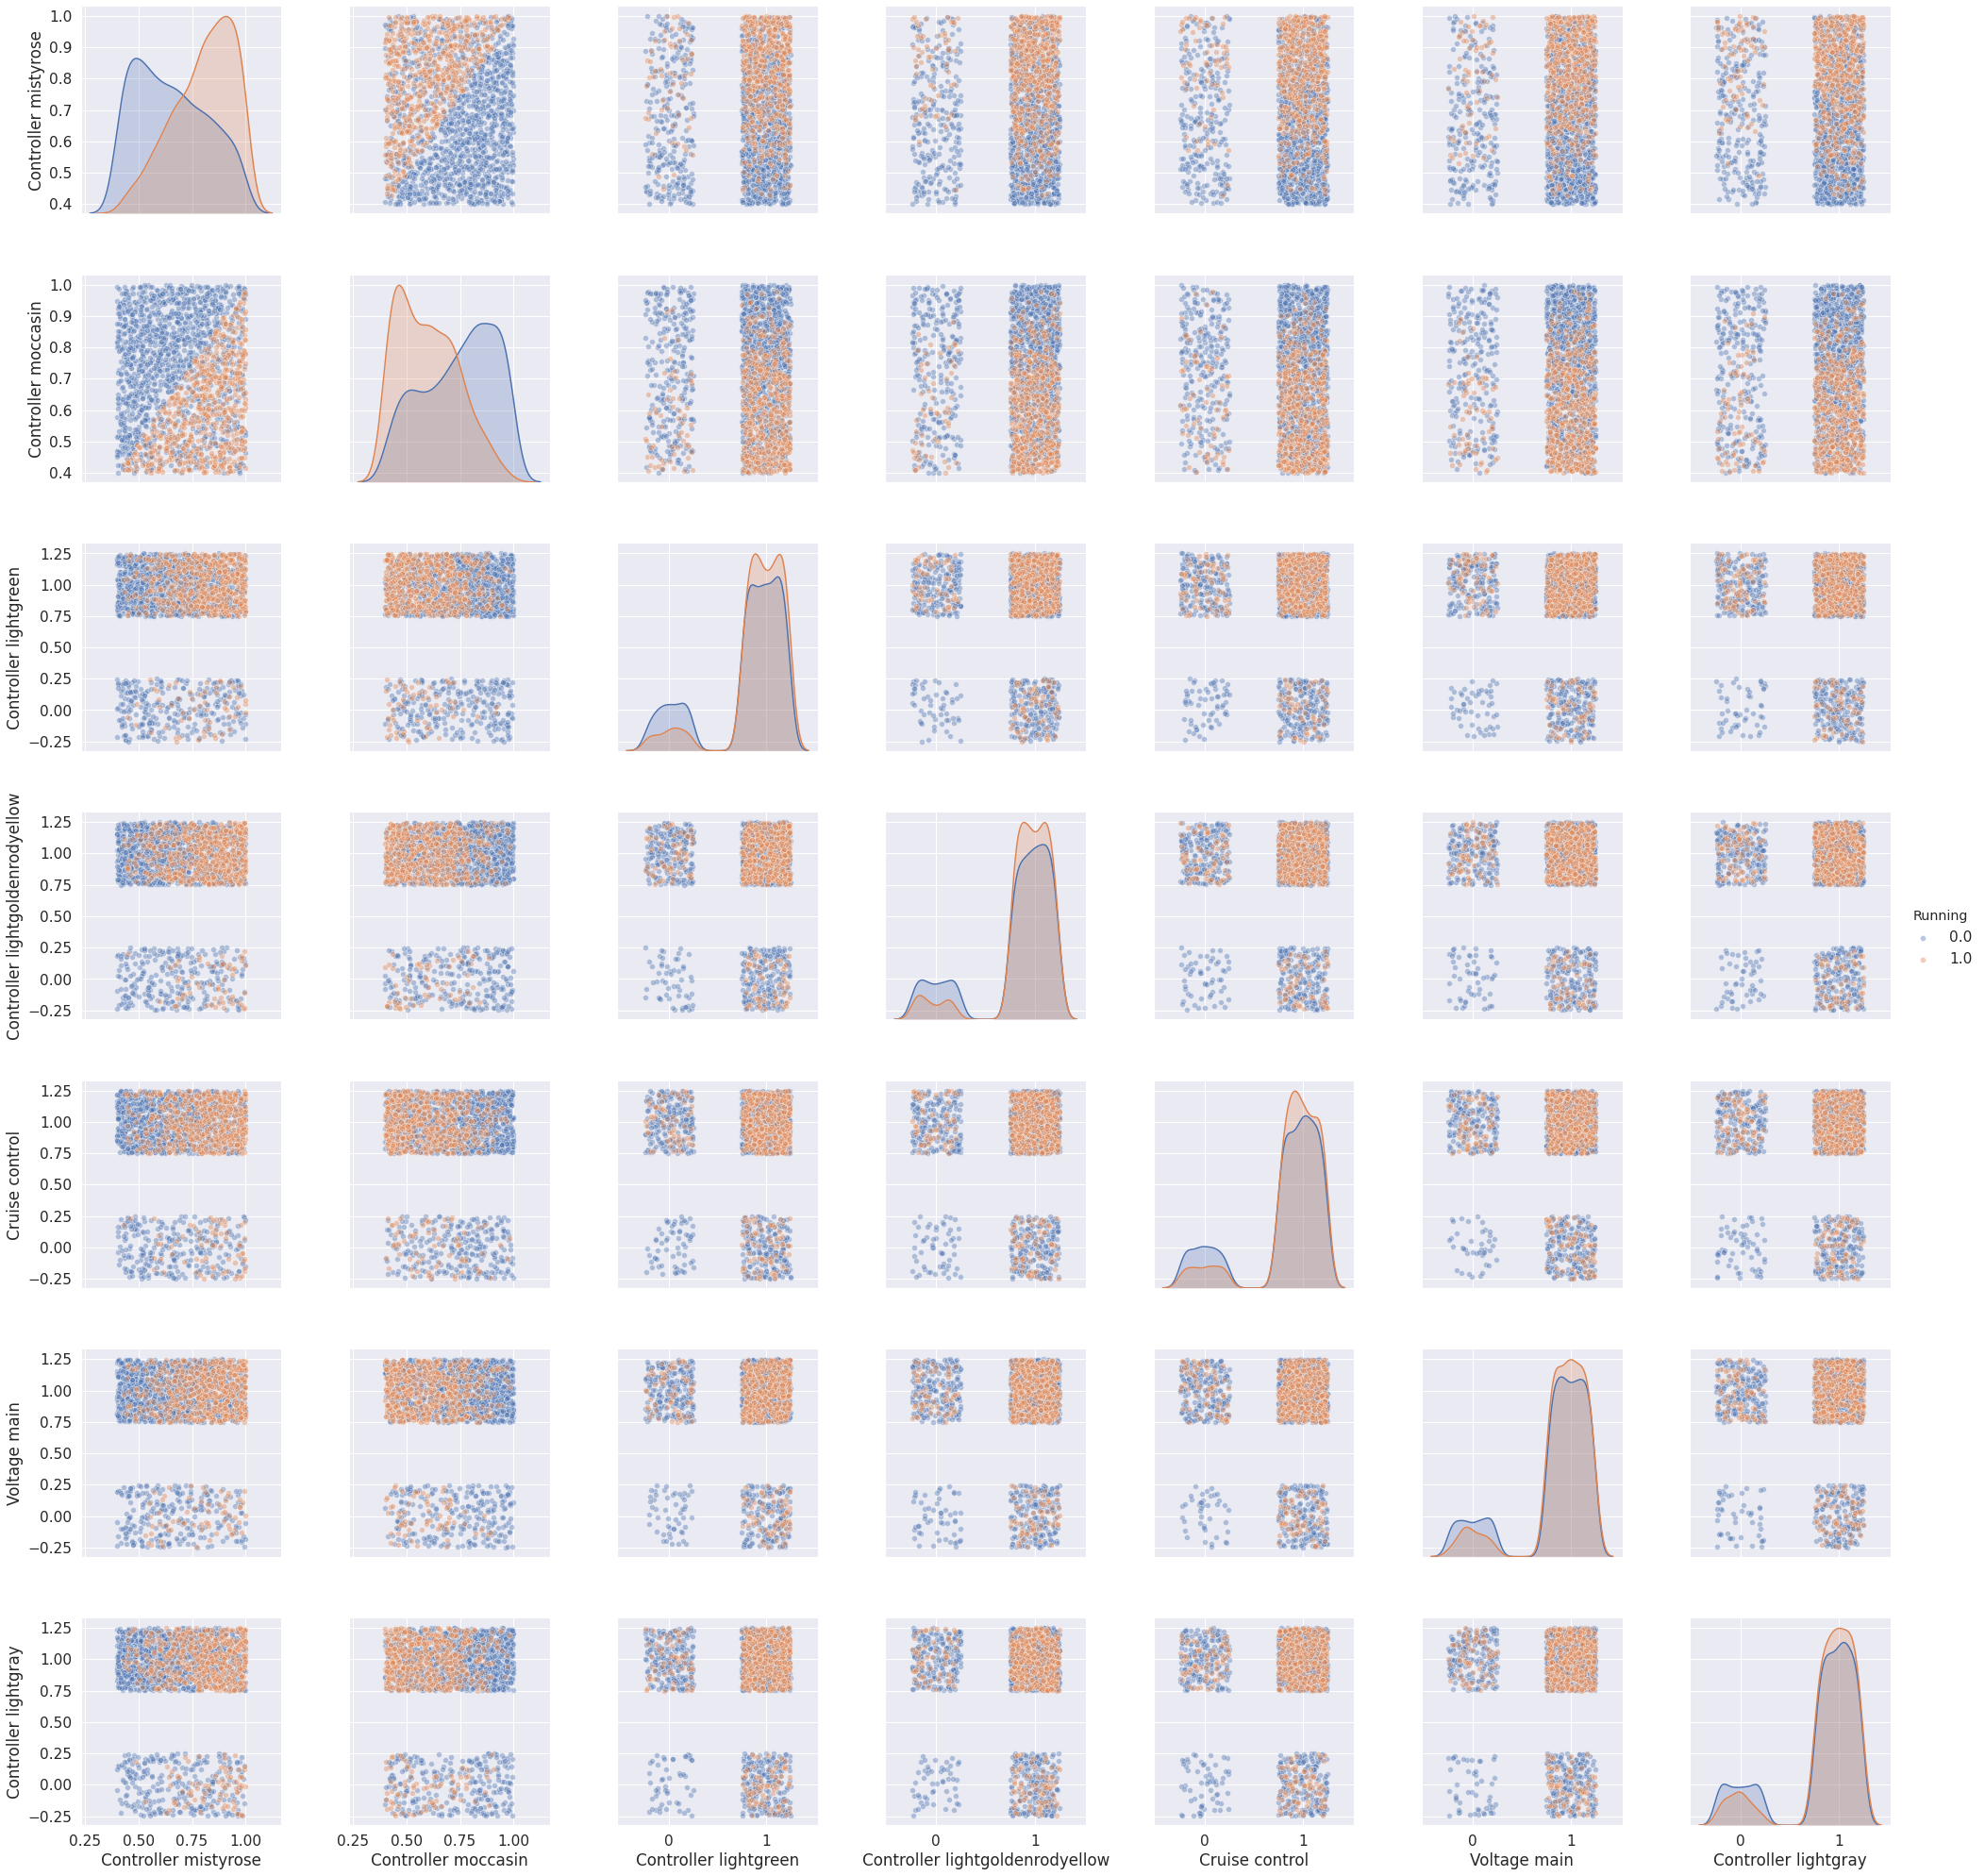

In [395]:
A=sn.pairplot(df_trainj,y_vars=columns[S][0:7],x_vars=columns[S][0:7],hue="Running",plot_kws={"s": 35,'alpha':0.4},height=4)
plt.show()

Lets filter out the cases where the **Blue Switch=0** and **Controller moccasin > Controller mistyrose** since we already know that the machine will not run in these cases

In [25]:
df_train2 = df_train[df_train["Blue Switch On"]!=0]

df_train2 = df_train2[df_train2["Controller moccasin"]<=df_train2["Controller mistyrose"]]

So that we can look at binary variables we should intoduce some jitter

In [26]:
df_train2j=df_train2.copy()
df_train2j['Running']=-df_train2j['Running']
#We identify the binary columns
CB=[c for c in columns if len(np.unique(df_train2[c]))<20]
CB=CB[2:]#We ignore the "Running" and "Blue Swich On"
for c in CB:
    df_train2j[c]+=np.random.uniform(-1/4,1/4,len(df_train2))

Now we look again at some of the others highly corrolated variables for easily spotted deppendencies

In [27]:
S=np.argsort(np.abs(np.array(df_train2.corr()['Running'])))[::-1]
S=S[2:]#We ignore the "Running" and "Blue Swich On"
S

array([72, 70, 71, 74, 73, 84, 82, 83, 80, 69, 81, 55,  4, 97, 99, 87, 86,
       34, 61, 23, 28, 38, 40, 43,  7, 27,  9, 53, 96, 93, 92, 65, 75, 56,
       63, 91, 24, 54, 37, 51, 94, 45, 41, 12,  2, 44,  8, 79, 67, 42, 60,
       85, 13, 39, 16, 32, 52, 89, 22, 33, 36, 31, 10, 78, 47, 30, 64, 25,
        3, 35, 17, 19, 98, 95, 49, 11, 18, 57,  6, 15, 68, 66, 29, 14, 88,
       77, 76, 62, 58, 21, 50, 26, 90, 59, 48, 46, 20,  5])

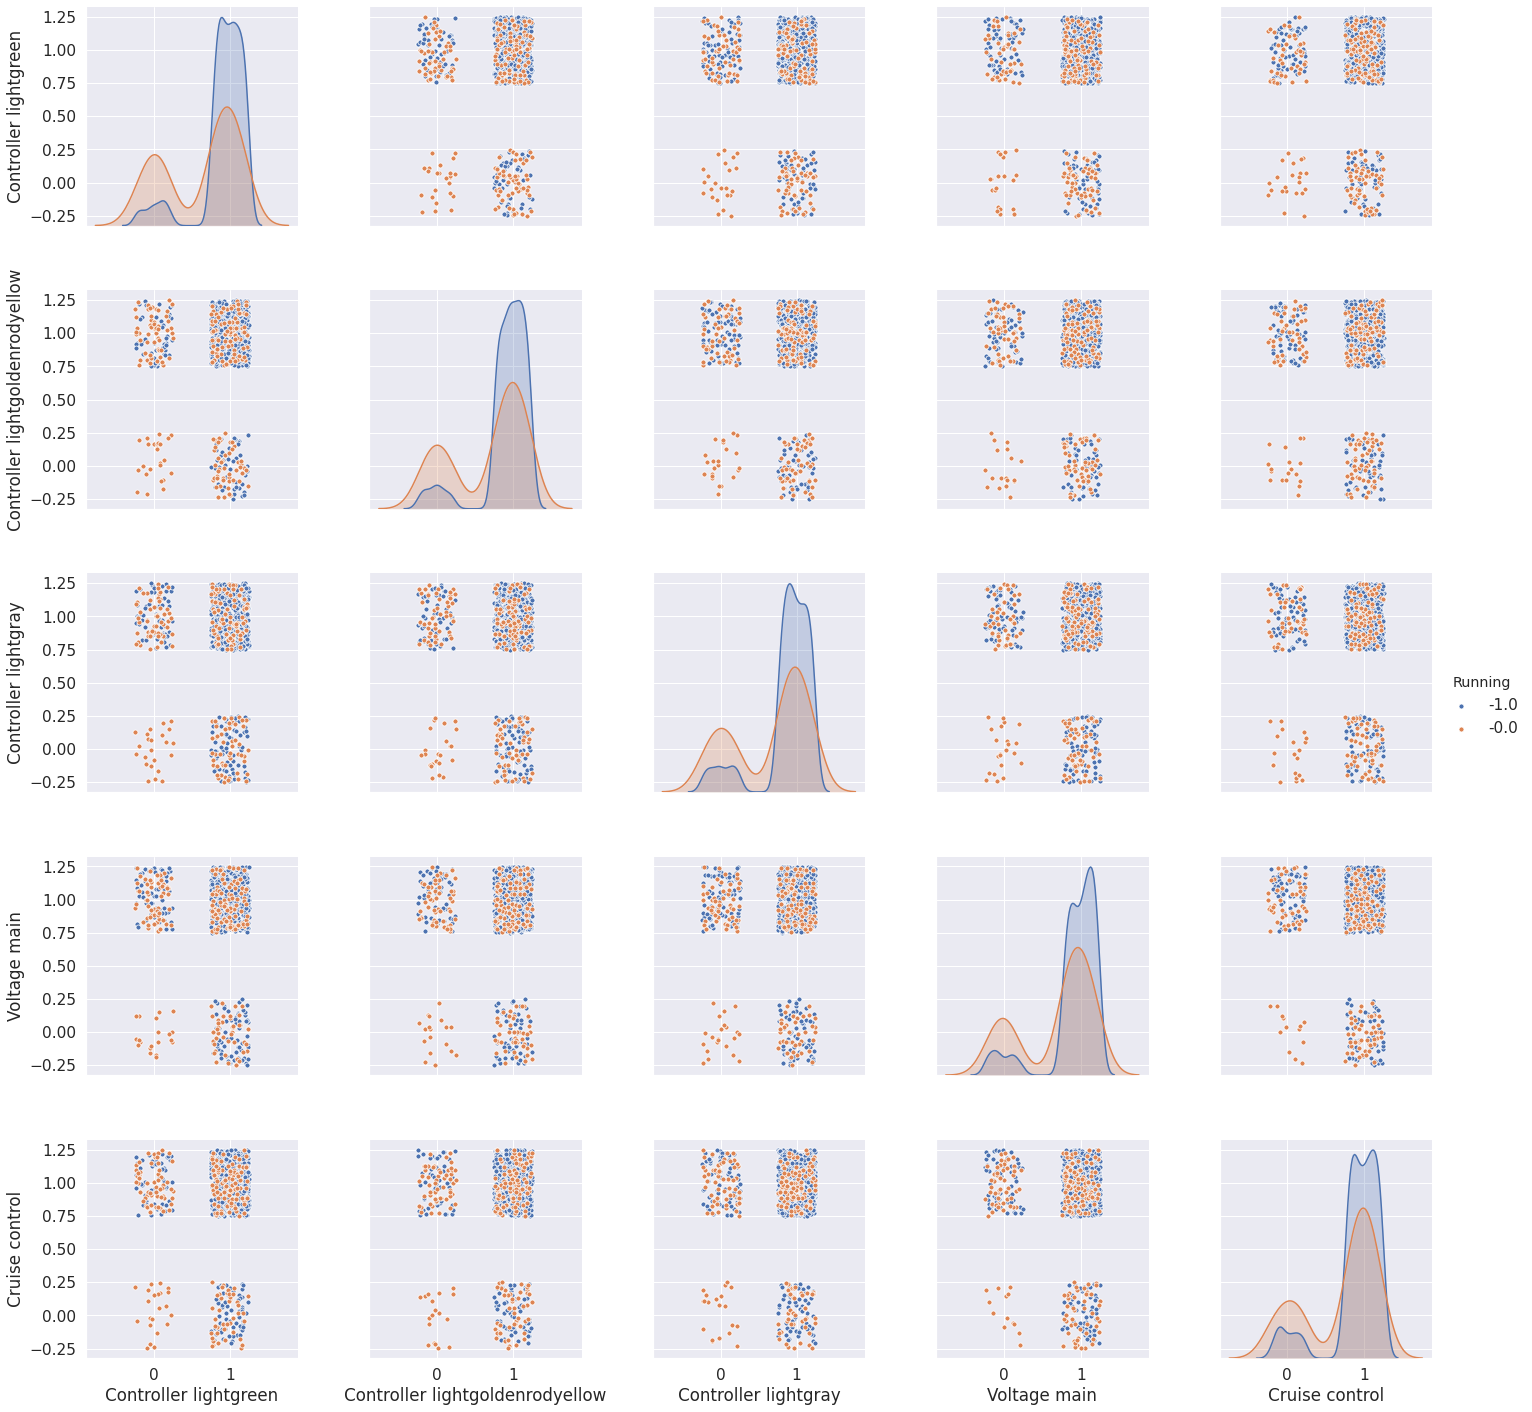

In [28]:
A=sn.pairplot(df_train2j,y_vars=columns[S][0:5],x_vars=columns[S][0:5],hue="Running",plot_kws={"s": 25},height=4)
plt.show()

We spot that for these variables if at least two of are 0 at the same time the machine does not run

Testing this hypothesis yields that it holds also in the original set:

In [29]:
BC=['Controller lightgreen', 'Controller lightgoldenrodyellow', 'Controller lightgray', 'Voltage main', 'Cruise control']
errors=0
for i in range(len(df_train)):
    if np.sum(df_train[BC],axis=1)[i]<=3:
        if df_train['Running'][i]:
            errors+=1
print("We had", errors, "errors :)")

We had 0 errors :)


Hence we can also filter out those cases :)

In [63]:
BC=['Controller lightgreen', 'Controller lightgoldenrodyellow', 'Controller lightgray', 'Voltage main', 'Cruise control']
df_train3 = df_train2[np.sum(df_train2[BC],axis=1)>3]

In [270]:
np.unique(df_train3["Running"],return_counts=True)

(array([0., 1.]), array([ 68, 623]))

wow only 68 fails cases not accounted for!
Lets repeat the previous procedure 

In [305]:
S=np.argsort(np.abs(np.array(df_train2.corr()['Running'])))[::-1]
S=S[2:]#We ignore the "Running" and "Blue Swich On" and the binaries we already used
#S=np.array(list(range(80,85)))
S,np.round(np.abs(np.array(df_train2.corr()['Running'])),3)
S=S[:10]

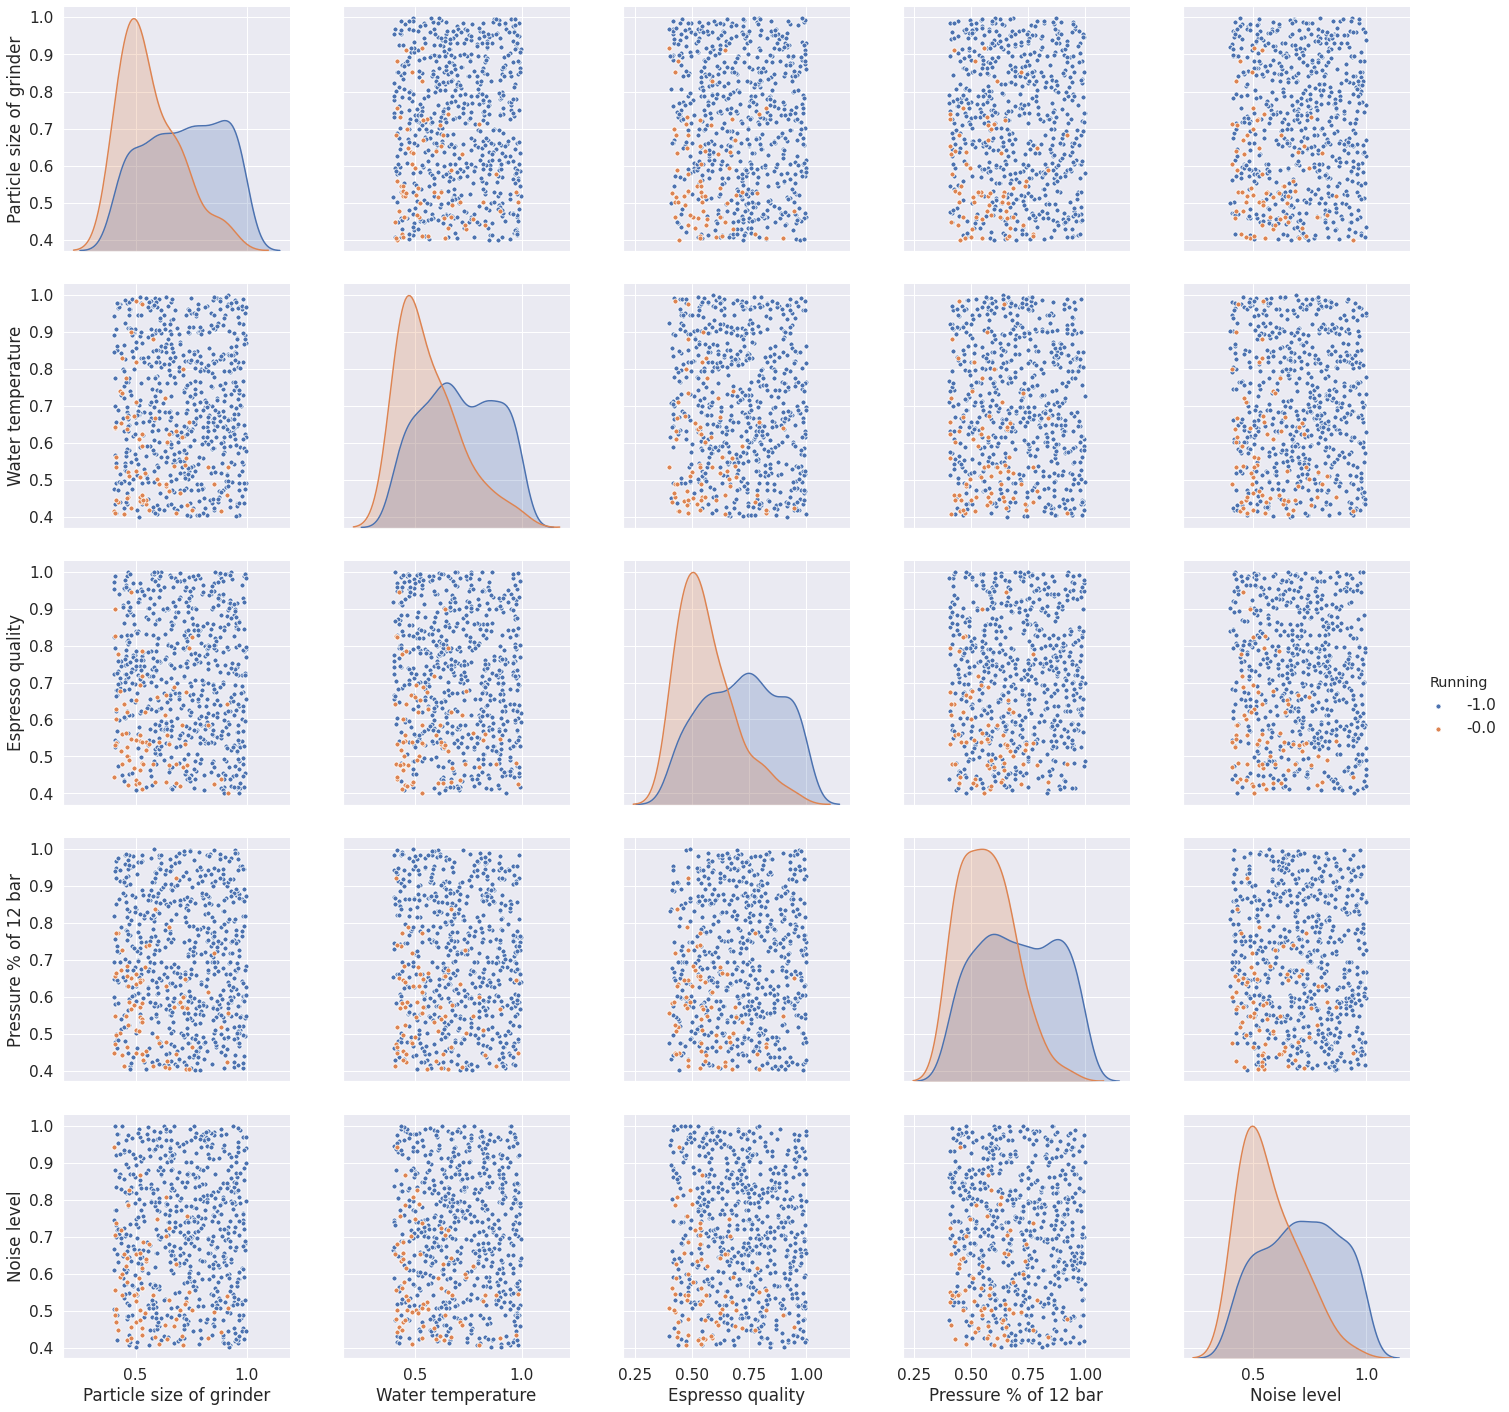

In [304]:
df_train3j=df_train3.copy()
df_train3j['Running']=-df_train3j['Running']
#We identify the binary columns
CB=[c for c in columns if len(np.unique(df_train3[c]))<20]
CB=CB[2:]#We ignore the "Running" and "Blue Swich On"
for c in CB:
    df_train3j[c]+=np.random.uniform(-1/4,1/4,len(df_train3))

A=sn.pairplot(df_train3j,y_vars=columns[S],x_vars=columns[S],hue="Running",plot_kws={"s": 25},height=4)
plt.show()

We suspect the mean=sum/5 of these outputs might be a good classifier

In [249]:
S=np.array(list(range(80,85)))

df_train4=pd.concat([df_train3[columns[0]],np.mean(df_train3[columns[S]],axis=1)],axis=1)


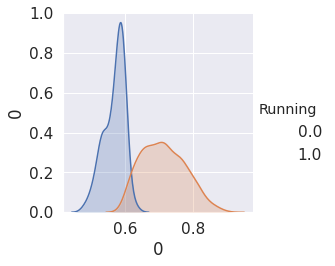

In [251]:
A=sn.pairplot(df_train4,y_vars=0,x_vars=0,hue="Running",plot_kws={"s": 25},height=4)
plt.show()

In [252]:
df_train4[df_train4["Running"]==0][0].describe()

count    68.000000
mean      0.569189
std       0.030125
min       0.484815
25%       0.549360
50%       0.579864
75%       0.592720
max       0.629065
Name: 0, dtype: float64

In [253]:
df_train4[df_train4["Running"]==1][0].describe()

count    623.000000
mean       0.713575
std        0.063426
min        0.600039
25%        0.660742
50%        0.711114
75%        0.760690
max        0.894771
Name: 0, dtype: float64

In [254]:
sum(np.array(df_train4[df_train4["Running"]==1][0])<0.6),sum(np.array(df_train4[df_train4["Running"]==0][0])>0.6)

(0, 2)

This looks great choosing 0.6 as a threshold gives a classifier that only makes 2 mistakes when classifing the last 691 samples <s>But since 2>0 this might imply that this was not the classifier he intendend :( </s>

Ok lets filter out our testset in the same way:

In [386]:
df_test  = data_test_db
df_testt  = data_test_db[np.abs(data_test_db["Blue Switch On"]-1/2)==1/2]

df_test2 = data_test_db[data_test_db["Blue Switch On"]==1]#here we loose all the evil points but we set them to 0 anyhow!
df_test2 = df_test2[df_test2["Controller moccasin"]<=df_test2["Controller mistyrose"]]

BC=['Controller lightgreen', 'Controller lightgoldenrodyellow', 'Controller lightgray', 'Voltage main', 'Cruise control']
df_test3 = df_test2[np.sum(df_test2[BC],axis=1)>3]

S=np.array(list(range(80,85)))
df_test4=pd.concat([df_test3[columns[0]],np.mean(df_test3[columns[S]],axis=1)],axis=1)
df_test4.describe()



###now we predict

df_test5=pd.concat([(df_test4[0]>0.6)*1,df_test4[0]],axis=1)
df_test5.columns=[0,1]
df_test5.describe()


df_test3["Running"]=df_test5[0]
df_test["Running"]=df_test5[0]
df_test["Running"]=(df_test['Running']==True)

df_testt["Running"]=df_test5[0]
df_testt["Running"]=(df_testt['Running']==True)

/home/alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

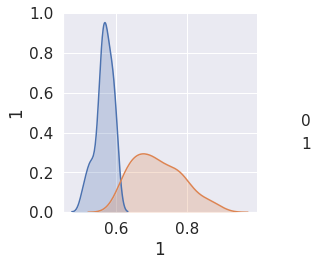

In [293]:
sn.pairplot(df_test5,y_vars=1,x_vars=1,height=4,hue=0)
plt.show()

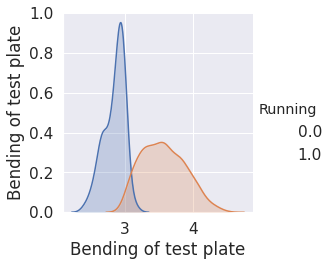

In [311]:
sn.pairplot(df_train3,y_vars=columns[79],x_vars=columns[79],hue="Running",plot_kws={"s": 25},height=4)
plt.show()

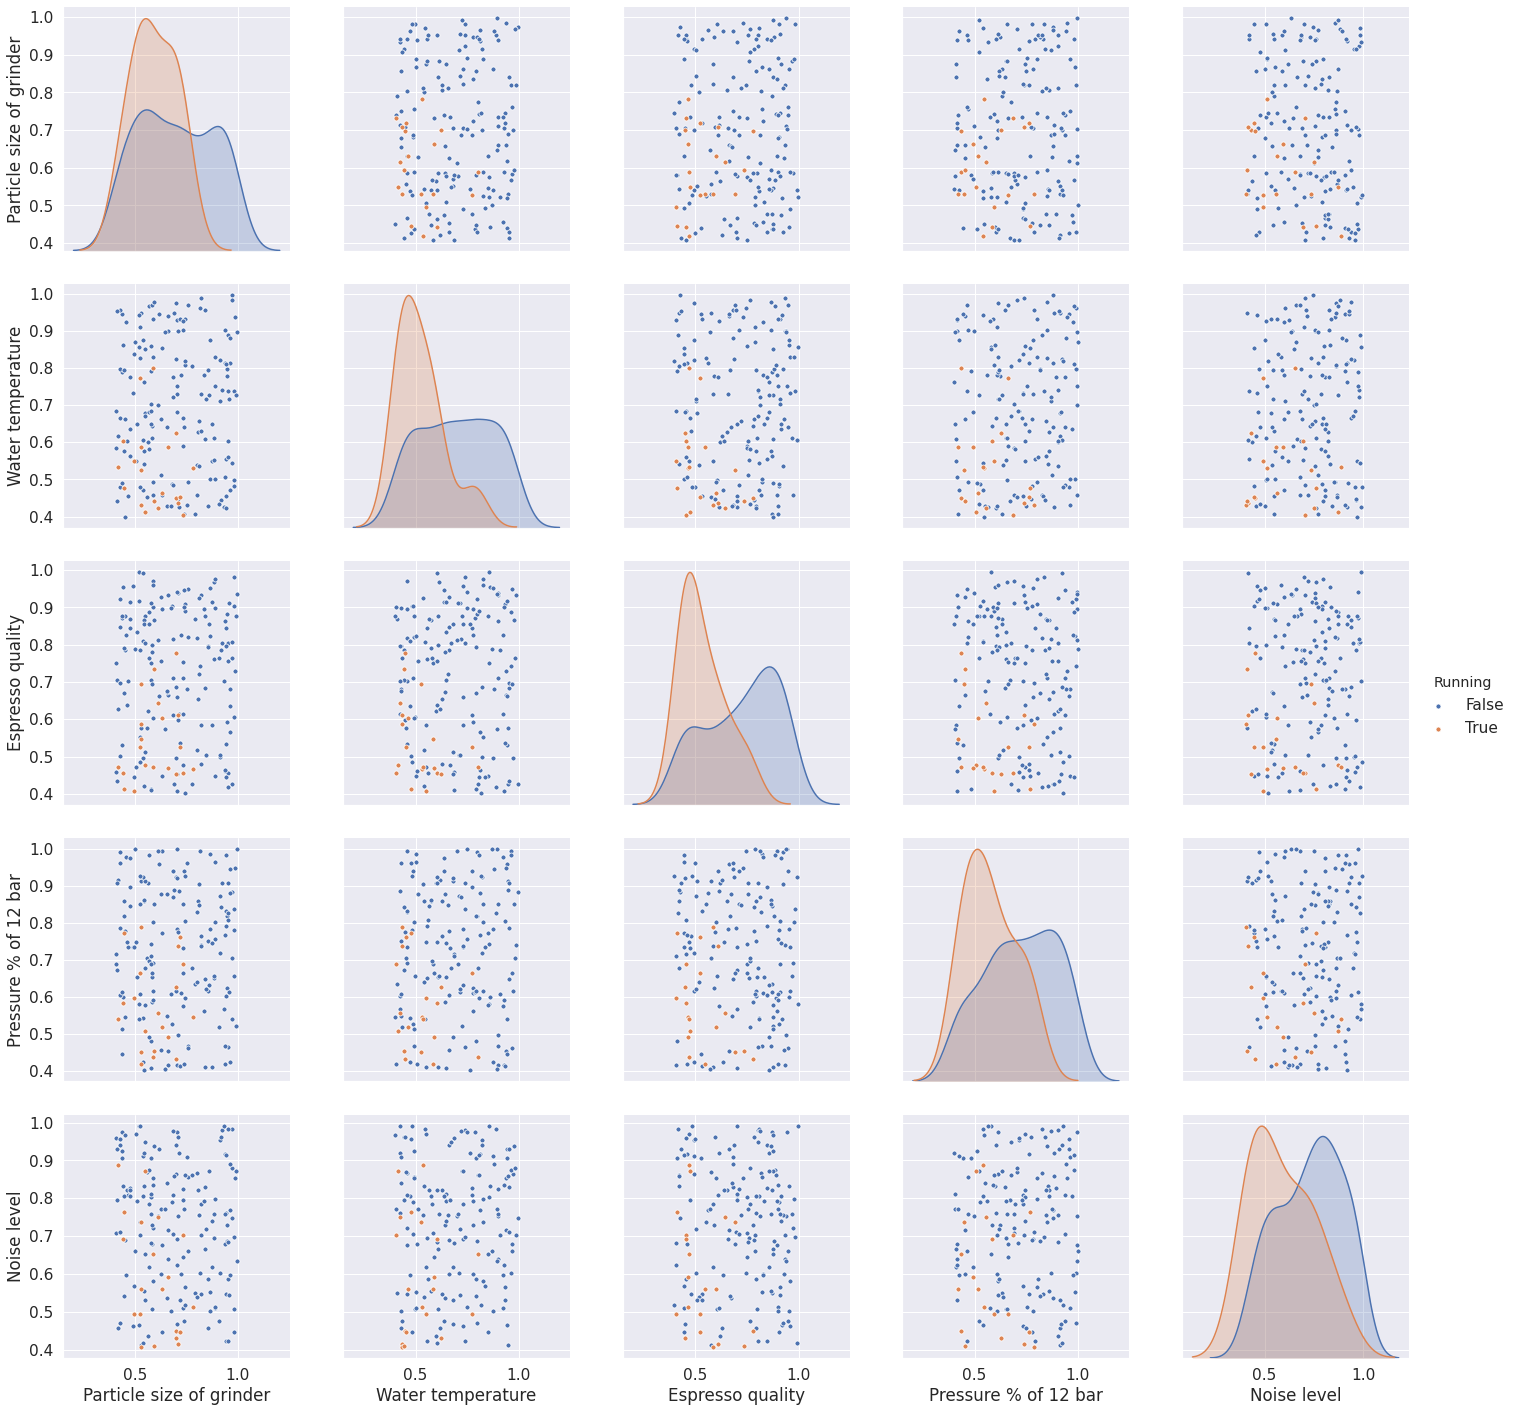

In [313]:
df_test3j=df_test3.copy()
df_test3j['Running']=-(df_test3j['Running']==1)
#We identify the binary columns
CB=[c for c in columns if len(np.unique(df_test3[c]))<20]
CB=CB[2:]#We ignore the "Running" and "Blue Swich On"
for c in CB:
    df_test3j[c]+=np.random.uniform(-1/4,1/4,len(df_test3))

A=sn.pairplot(df_test3j,y_vars=columns[S],x_vars=columns[S],hue="Running",plot_kws={"s": 25},height=4)
plt.show()

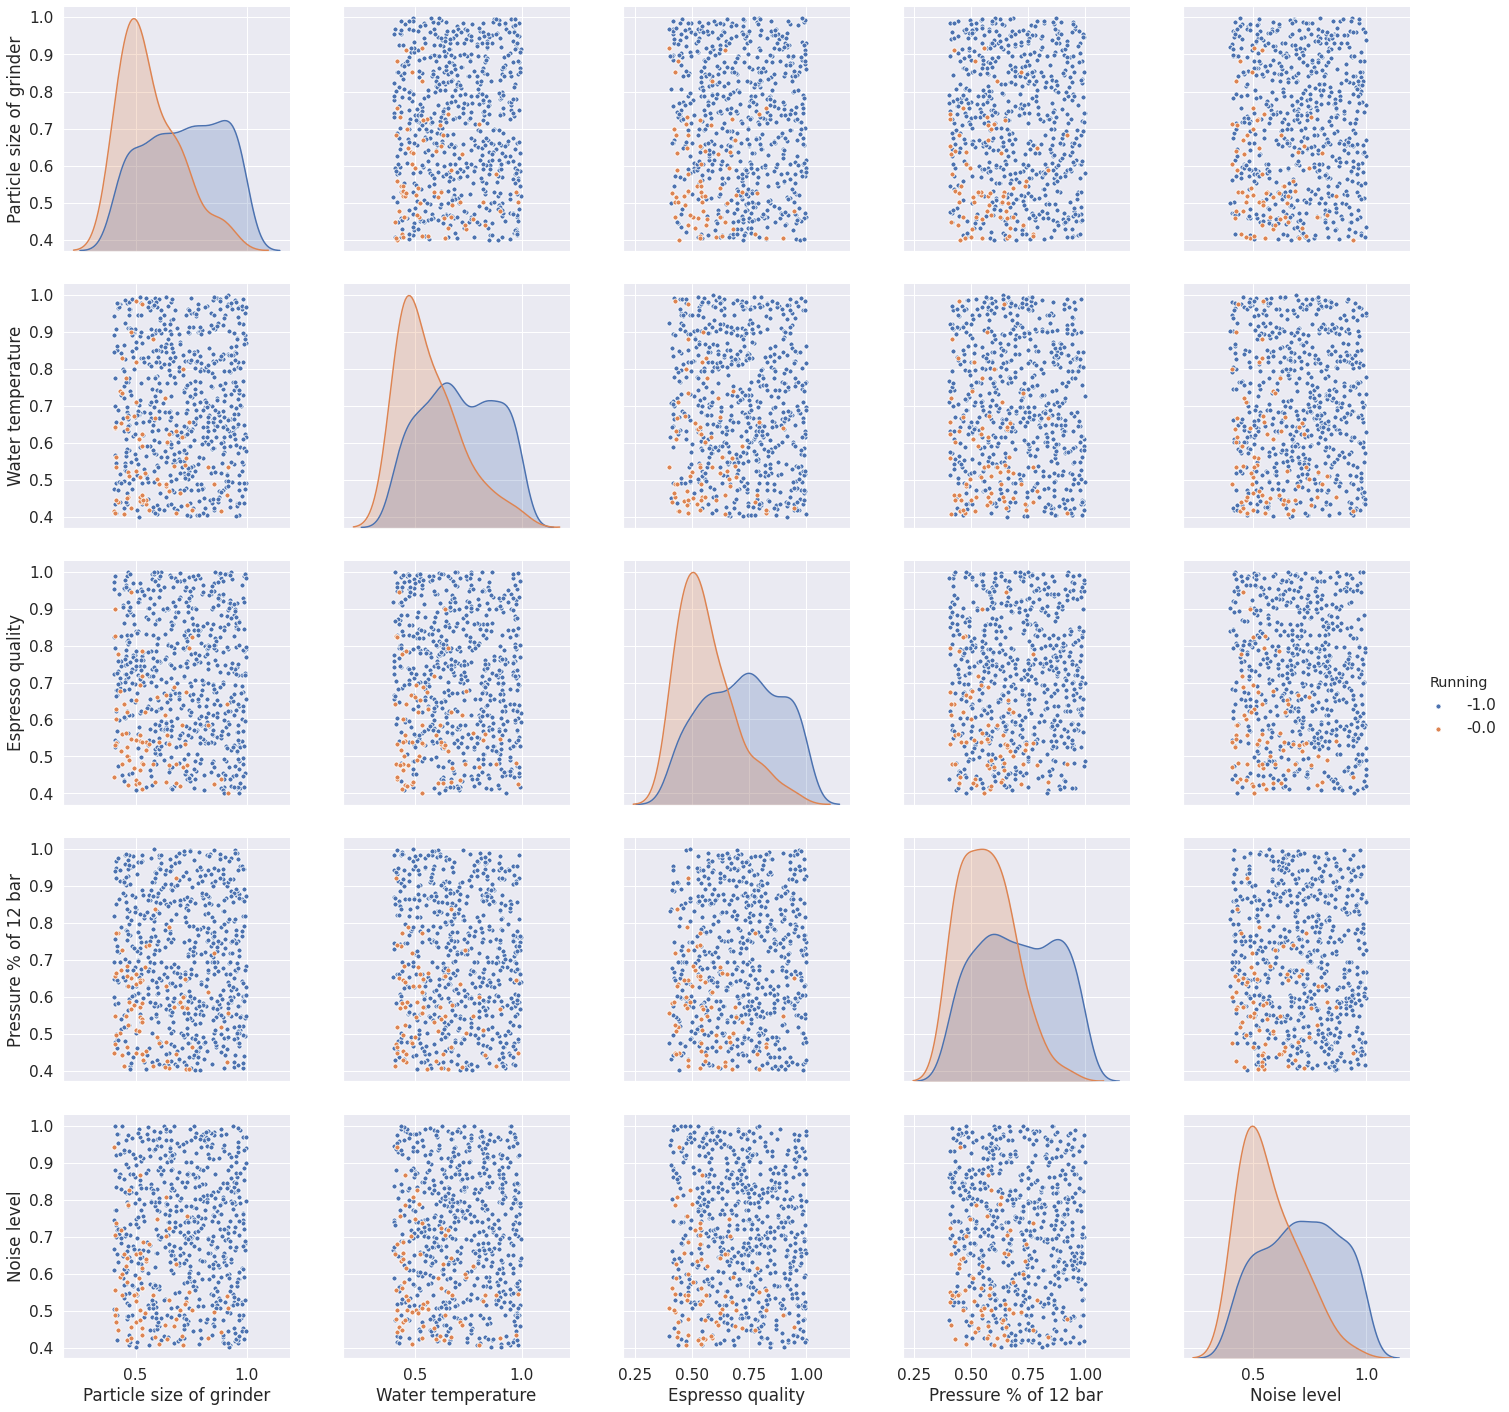

In [315]:
df_train3j=df_train3.copy()
df_train3j['Running']=-df_train3j['Running']
#We identify the binary columns
CB=[c for c in columns if len(np.unique(df_train3[c]))<20]
CB=CB[2:]#We ignore the "Running" and "Blue Swich On"
for c in CB:
    df_train3j[c]+=np.random.uniform(-1/4,1/4,len(df_train3))

A=sn.pairplot(df_train3j,y_vars=columns[S],x_vars=columns[S],hue="Running",plot_kws={"s": 25},height=4)
plt.show()

In [330]:
from scipy.stats import ks_2samp

In [335]:
i=4

ks_2samp(np.array(df_train).T[0]*np.array(df_train).T[i], np.array(df_test).T[0]*np.array(df_test).T[i])

Ks_2sampResult(statistic=0.312280701754386, pvalue=4.218847493575595e-15)

In [387]:
c=[0,1,
   70,71,72,73,74,
   80,81,82,83,84
   ,98,99]

x=df_train[columns[c]]
y=df_testt[columns[c]]

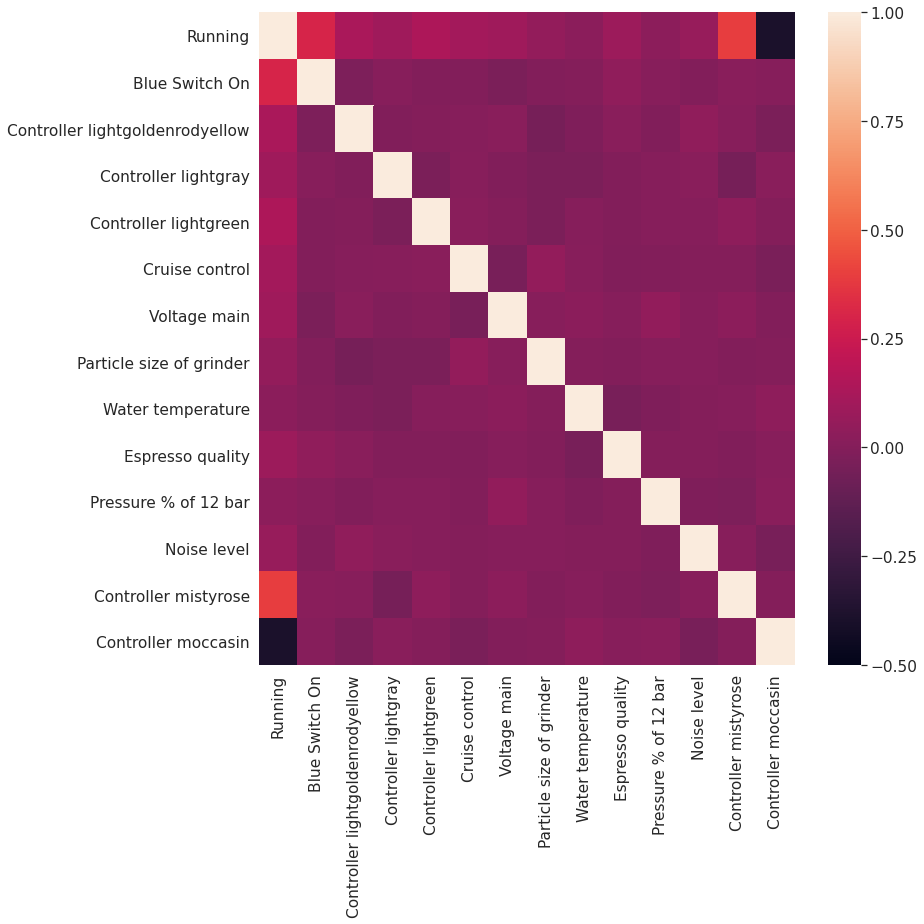

In [388]:
plt.figure(figsize = (12,12))
sn.heatmap(df_train[columns[c]].corr(), annot=False,vmin=-1/2, vmax=1)
plt.show()

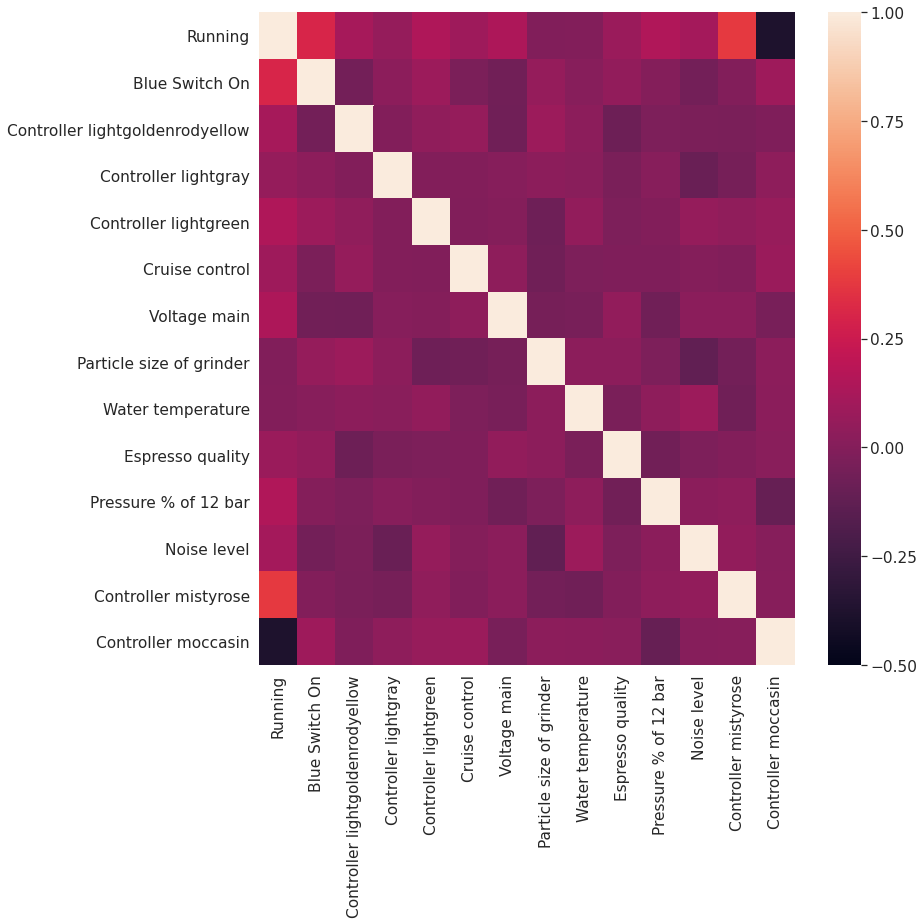

In [391]:
plt.figure(figsize = (12,12))
sn.heatmap(df_testt[columns[c]].corr(), annot=False, vmin=-1/2,vmax=1)
plt.show()